In [ ]:
!pip install matplotlib

In [ ]:
!pip install opencv-python-headless numpy

In [ ]:
#connect drive
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
# %cd '/content/gdrive/MyDrive/Thesis/Demo_code/rex'

/content/gdrive/MyDrive/rex


In [ ]:
%cd '/content/gdrive/MyDrive/rex/rex'

/content/gdrive/MyDrive/rex/rex


In [ ]:
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.6/151.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.4/783.4 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.9/298.9 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.3/83.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 6

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import pandas as pd
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
from tensorflow import keras

In [ ]:
from skimage.filters import threshold_otsu
from sklearn.cluster import KMeans
from itertools import combinations
from collections import defaultdict
import itertools
import functools

In [ ]:
from page_extractor import PageExtractor
from hough_line_corner_detector import HoughLineCornerDetector
from processors import Resizer, OtsuThresholder, FastDenoiser
#from string_prediction import image_binarization,find_digit_coordinates,detect_contour_in_contours,crop_digit,sort_contours,custom_tuple_sorting,predicting,find_cell_contours

In [ ]:
path = '/content/gdrive/MyDrive/rex/rex/photo'

In [ ]:
def count_files(directory):
    folders = [name for name in os.listdir(directory)]
    return len(folders)

In [ ]:
total=count_files(path)-2
total

0

In [ ]:
def showImage(image_path):
  image = Image.open(image_path)
  plt.imshow(image)
  plt.axis('off')
  plt.show()

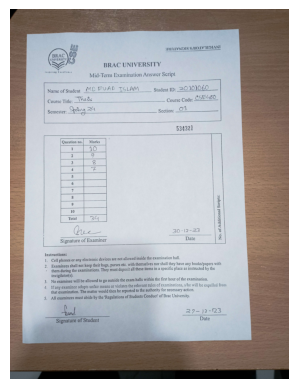

In [ ]:
#verify images (human)
from PIL import Image
import matplotlib.pyplot as plt

showImage(path+'/0.jpg')
for i in range (0,total):
  image_path = path+'/'+str(i)+'.jpg'
  showImage(image_path)

In [ ]:
def fix_image_orientation(img_path):
    page_extractor = PageExtractor(
        preprocessors = [
            Resizer(height = 1280, output_process = True),
            FastDenoiser(strength = 9, output_process = True),
            OtsuThresholder(output_process = True)
        ],
        corner_detector = HoughLineCornerDetector(
            rho_acc = 1,
            theta_acc = 180,
            thresh = 100,
            output_process = True
        )
    )
    extracted = page_extractor(img_path)
    correct_image=cv2.resize(extracted, (1500, 2000))
    return correct_image

In [ ]:
def detectId(correct_image):
  cropped_id = correct_image[350:415,1045:1360]
  return cropped_id

[310:376,1055:1375]


In [ ]:
def detectSection(correct_image):
  cropped_section = correct_image[495:560,1035:1360]
  return cropped_section

[455:523,1040:1375]



In [ ]:
def detectGrades(correct_image):
  cropped_grades=[]
  y_start=770
  y_end=815
  x_start=400
  x_end=558
  h=10
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  y_start+=45
  y_end+=45
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  y_start+=45
  y_end+=45
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  y_start+=45
  y_end+=45
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  y_start+=45
  y_end+=45
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  y_start+=45
  y_end+=45
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  y_start+=45
  y_end+=45
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  y_start+=45
  y_end+=45
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  y_start+=45
  y_end+=45
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  y_start+=45
  y_end+=45
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  y_start+=45
  y_end+=45
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  return cropped_grades


  y_start=750
  y_end=799
  x_start=387
  x_end=549
  y_start+=50

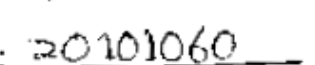

In [ ]:
#test
img = fix_image_orientation(path+'/0.jpg')
# img=img[770+45-10:815+45-10,400:558]
img=detectId(img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [108]:
def remove_lines_and_dots(image, min_size_threshold=1, max_size_threshold=5, min_width_threshold=5, max_width_threshold=20):
    # Convert the image to grayscale
    # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding to binarize the image
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)  # used to send

    # Find horizontal lines using a kernel
    kernel = np.ones((1, 5), np.uint8)
    lines = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)

    # Find contours of the lines and dots
    contours, _ = cv2.findContours(lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Remove horizontal lines and small dots based on the size thresholds
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        print("w",w," h",h)
        if  min_width_threshold < w < max_width_threshold :
            image[y:y+h, x:x+w] = 0 # Set the region to black
        if  h >= max_size_threshold:
            image[y:y+h, x:x+w] = 255 # Set the region to white

    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return image

def segment_and_save_digits(img, output_folder): #PASS IMG HERE
    # Read the input image
    original_image = img.copy()

    # Remove horizontal lines from each digit
    cleaned_original_image = remove_lines_and_dots(original_image)

    # Convert the cleaned image to grayscale
    gray_image = cleaned_original_image.copy()  # gray_image = cv2.cvtColor(cleaned_original_image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding to binarize the image
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours based on x-coordinate
    contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Collect information about each segmented digit's size
    digit_sizes = []

    # Iterate through the contours
    for idx, contour in enumerate(contours):
        # Get bounding box for each contour
        x, y, w, h = cv2.boundingRect(contour)

        # Extract each digit from the original image
        digit = cleaned_original_image[y:y + h, x:x + w]

        # Save each digit as a separate image
        digit_path = os.path.join(output_folder, f'digit_{idx + 1}.png')
        cv2.imwrite(digit_path, digit)

        # Append the size of the digit to the list
        digit_sizes.append((w, h))

        # Draw a rectangle around the digit on the original image
        cv2.rectangle(cleaned_original_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the result
    cv2_imshow(cleaned_original_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Return the list of digit sizes
    return digit_sizes

def get_image_size(image_path):
    try:
        with Image.open(image_path) as img:
            width, height = img.size
            return width, height
    except Exception as e:
        print(f"Error: {e}")
        return None

def is_low_pixel_count(image_path, threshold):
    # Read the image
    image = cv2.imread(image_path)

    # Get the total number of pixels in the image
    total_pixels = image.size

    # Print the pixel count and image name
    print(f"Image: {os.path.basename(image_path)}, Pixel Count: {total_pixels}")

    # Set a threshold for low pixel count (adjust as needed)
    if total_pixels < threshold:
        return True
    else:
        return False

def filter_images_by_pixel_count(folder_path, output_folder, threshold):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Construct the full path to the image
            image_path = os.path.join(folder_path, filename)

            # Check if the image has a low pixel count
            if is_low_pixel_count(image_path, threshold):
                print(f"Removing image: {filename}")
                continue  # Skip this image

            # Copy the image to the output folder
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, cv2.imread(image_path))

def extract_region(image_path, target_width, target_height):
    try:
        with Image.open(image_path) as img:
            width, height = img.size

            # Define the crop coordinates
            crop_width = 7
            crop_height = height
            crop_left = width - crop_width
            crop_right = width

            # Crop the right 7x21 pixels
            cropped_image = img.crop((crop_left, 0, crop_right, crop_height))

            # Save the cropped image
            cropped_image.save('digit_ex1.png')

            # Save the remaining part of the image
            remaining_image = img.crop((0, 0, crop_left, crop_height))
            remaining_image.save('digit_ex2.png')

            print("Cropped and saved successfully.")
    except Exception as e:
        print(f"Error: {e}")




w 37  h 1
w 90  h 5
w 15  h 2
w 10  h 1
w 16  h 2
w 15  h 3
w 10  h 1
w 10  h 3
w 17  h 4
w 5  h 2
w 11  h 3
w 19  h 4
w 17  h 4
w 15  h 3
w 13  h 4
w 17  h 4


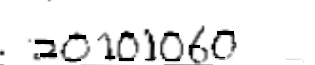

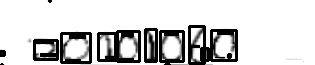

Digit 1 Size: 4 x 4 pixels
Digit 2 Size: 1 x 1 pixels
Digit 3 Size: 23 x 19 pixels
Digit 4 Size: 1 x 1 pixels
Digit 5 Size: 29 x 29 pixels
Digit 6 Size: 17 x 27 pixels
Digit 7 Size: 22 x 30 pixels
Digit 8 Size: 11 x 32 pixels
Digit 9 Size: 23 x 30 pixels
Digit 10 Size: 4 x 1 pixels
Digit 11 Size: 15 x 37 pixels
Digit 12 Size: 6 x 1 pixels
Digit 13 Size: 7 x 12 pixels
Digit 14 Size: 25 x 30 pixels
Digit 15 Size: 2 x 3 pixels
Image: digit_1.png, Pixel Count: 48
Removing image: digit_1.png
Image: digit_2.png, Pixel Count: 3
Removing image: digit_2.png
Image: digit_3.png, Pixel Count: 1311
Image: digit_4.png, Pixel Count: 3
Removing image: digit_4.png
Image: digit_5.png, Pixel Count: 2523
Image: digit_6.png, Pixel Count: 1377
Image: digit_7.png, Pixel Count: 1980
Image: digit_8.png, Pixel Count: 1056
Image: digit_9.png, Pixel Count: 2070
Image: digit_10.png, Pixel Count: 12
Removing image: digit_10.png
Image: digit_11.png, Pixel Count: 1665
Image: digit_12.png, Pixel Count: 18
Removing ima

In [110]:
output_folder = '/content/gdrive/MyDrive/rex/rex/photo/digit'
digit_sizes = segment_and_save_digits(img, output_folder)

# Display the sizes of each segmented digit
for idx, size in enumerate(digit_sizes):
    print(f"Digit {idx + 1} Size: {size[0]} x {size[1]} pixels")

# # Example usage
input_folder = '/content/gdrive/MyDrive/rex/rex/photo/digit'
output_folder = '/content/gdrive/MyDrive/rex/rex/photo/digit_cleaned'
pixel_count_threshold = 1000 # Adjust as needed

filter_images_by_pixel_count(input_folder, output_folder, pixel_count_threshold)


In [ ]:
def find_cell_contours(frame_image, crop_image):
    white_pixels = np.where(frame_image == 255)
    y = white_pixels[0]
    x = white_pixels[1]
    for i in range(len(y)):
        crop_image[y[i]][x[i]] = 255
    return crop_image

def image_binarization(image):
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, img_bin = cv2.threshold(image, 230, 255, cv2.THRESH_BINARY)
    return img_bin

def crop_digit(image, x0, y0, x1, y1):
    img_crop = image[y0 - 2:y1 + 2, x0 - 2:x1 + 2]
    res_crop_img = cv2.resize(img_crop, (28, 28))
    prediction_digit = predicting(res_crop_img)
    return prediction_digit

def predicting(image):
    img = keras.preprocessing.image
    model = keras.models.load_model('/content/gdrive/MyDrive/Thesis/Models_compiled/docDetector.h5')
    x = img.img_to_array(image)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    return np.argmax(classes[0])

def find_digit_coordinates(image):
    cnts, _ = cv2.findContours(
        image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    bounding_boxes = sort_contours(cnts, method="left-to-right")[1:]
    all_contours = []
    for i in range(0, len(bounding_boxes)):
        x, y, w, h = bounding_boxes[i][0], bounding_boxes[i][1], bounding_boxes[i][2], bounding_boxes[i][3]
        if h > 20 and w > 10:
            digit_coordinates = [x, y, x + w, y + h]
            all_contours.append(digit_coordinates)
    return all_contours

def custom_tuple_sorting(s, t, offset=4):
    x0, y0, _, _ = s
    x1, y1, _, _ = t
    if abs(y0 - y1) > offset:
        if y0 < y1:
            return -1
        else:
            return 1
    else:
        if x0 < x1:
            return -1

        elif x0 == x1:
            return 0

        else:
            return 1

def sort_contours(cnts, method):
    bounding_boxes = [cv2.boundingRect(c) for c in cnts]
    if method == "top-to-right":
        bounding_boxes.sort(key=functools.cmp_to_key(lambda s, t: custom_tuple_sorting(s, t, 4)))

    elif method == "left-to-right":
        bounding_boxes.sort(key=lambda tup: tup[0])

    return bounding_boxes

def detect_contour_in_contours(all_contours):
    for rec1, rec2 in itertools.permutations(all_contours, 2):
        if rec2[0] >= rec1[0] and rec2[1] >= rec1[1] and rec2[2] <= rec1[2] and rec2[3] <= rec1[3]:
            in_rec = [rec2[0], rec2[1], rec2[2], rec2[3]]
            all_contours.remove(in_rec)
    return all_contours

def remove_lines(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply adaptive thresholding to binarize the image
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find horizontal lines using a kernel
    kernel = np.ones((1, 5), np.uint8)
    lines = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)

    # Subtract lines from the original image
    cleaned_image = cv2.subtract(image, cv2.cvtColor(lines, cv2.COLOR_GRAY2BGR))

    return cleaned_image

In [ ]:
def predictedString(img):
  image_bin = image_binarization(img)

  contours_arr = find_digit_coordinates(image_bin)

  right_contours = detect_contour_in_contours(contours_arr)

  s = ""
  for rec in right_contours:
      prediction = crop_digit(image_bin, rec[0], rec[1], rec[2], rec[3])
      s += str(prediction)
  return s


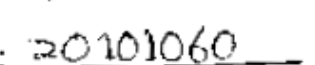

1/1 [==============================] - 0s 75ms/step


AttributeError: ignored

In [ ]:
all_student_grades=[]
all_student_id=[]
all_student_section=[]

for i in range(total):
  image_path = path+'/'+str(i)+'.jpg'

  correct_image = fix_image_orientation(image_path)

  cropped_id = detectId(correct_image)
  cropped_section = detectSection(correct_image)
  cropped_grades = detectGrades(correct_image)

  cv2_imshow(cropped_id)
  id = predictedString(cropped_id)
  section = predictedString(cropped_section)
  grades=[]
  for i in cropped_grades:
    grades.append(predictedString(i))

  all_student_grades.append(grades)
  all_student_id.append(id)
  all_student_section.append(section)

tf.keras.backend.clear_session()

In [ ]:
print(all_student_id)
print(all_student_section)
print(all_student_grades)

['200300']
['03']
[['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']]


In [ ]:
import csv

# Data to be written into the CSV file
data = [['Section', 'Id', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10','Total']]

for i in range(0,len(all_student_id)):
  data.append([all_student_section[i],all_student_id[i],all_student_grades[i][0],
              all_student_grades[i][1],all_student_grades[i][2],all_student_grades[i][3],
              all_student_grades[i][4],all_student_grades[i][5],all_student_grades[i][6],
              all_student_grades[i][7],all_student_grades[i][8],all_student_grades[i][9],
              all_student_grades[i][10]])

# Specify the file path
result_file_path = '/content/gdrive/MyDrive/Thesis/OCR_Implementation/Result/grade.csv' # Replace with your desired file path

# Writing data to the CSV file
with open(result_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

print(f'CSV file has been created at: {result_file_path}')
